## Import Libraries 

In [51]:
import os 
import yaml 
import random 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

random.seed( 17 )

In [52]:
plt.rcParams['font.size'] = 14 
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['lines.linewidth'] = .5

In [53]:
# parent dir 
parent_dir = '/data/NSE/bindata_indices/'
date_name = [ name for name in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, name)) and name.startswith('20')]
dates = pd.to_datetime( date_name , format='%Y%m%d')
dates = dates.strftime('%d-%m-%Y')
print( f'Number of Dates: {len(date_name)}')

Number of Dates: 354


In [54]:
date_format = '%Y%m%d'
date_time_format = '%d-%m-%Y %H:%M:%S'

## Example workflow for one date 

In [55]:
with open('user_input.yaml', 'r') as f:
    input = yaml.safe_load(f)

In [56]:
def drop_weekends(date_range: pd.DatetimeIndex) -> pd.DatetimeIndex:
    """Remove weekends (Saturday and Sunday) from a pandas date range."""
    return date_range[~date_range.weekday.isin([5, 6])]

In [57]:
# user input : date range 

dates = pd.date_range( start= input['start_date'] , end = input['end_date'] , freq = 'D' )
dates = drop_weekends( dates )
dates = dates.strftime( date_format= date_format).to_list()

dates 

['20250317', '20250318', '20250319', '20250320', '20250321']

In [58]:
def format_dates(date_list):
    parsed_dates = pd.to_datetime(date_list, format='%Y%m%d')
    return parsed_dates.strftime('%d-%m-%Y').tolist()

In [59]:
dates_formated = format_dates( dates )
dates_formated

['17-03-2025', '18-03-2025', '19-03-2025', '20-03-2025', '21-03-2025']

In [60]:
def get_log_file_path( date_name : str , parent_dir : str =  '/data/NSE/bindata_indices/' ) : 
    dir = os.path.join( parent_dir , date_name , 'bin_data_archival_' + date_name + '.log')
    return dir 

In [61]:
dates_log_path = [ get_log_file_path( date ) for date in dates ]
dates_log_path

['/data/NSE/bindata_indices/20250317/bin_data_archival_20250317.log',
 '/data/NSE/bindata_indices/20250318/bin_data_archival_20250318.log',
 '/data/NSE/bindata_indices/20250319/bin_data_archival_20250319.log',
 '/data/NSE/bindata_indices/20250320/bin_data_archival_20250320.log',
 '/data/NSE/bindata_indices/20250321/bin_data_archival_20250321.log']

In [62]:
for path , date in zip( dates_log_path , dates_formated ) : 
    small_chunk_data = pd.read_csv( path  ,  nrows  = 20 , usecols= [0,1,2,4,8,12] )
    print(f'Log file for {date}')
    print( small_chunk_data )
    print('-'*10)

Log file for 17-03-2025
        Date      Time                                      Symbol  \
0   20250317  09:15:01                        NSEFNO_BANKNIFTY_H25   
1   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_40500.00_BANKNIFTY_PE   
2   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_41000.00_BANKNIFTY_PE   
3   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_41500.00_BANKNIFTY_PE   
4   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_42000.00_BANKNIFTY_PE   
5   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_42500.00_BANKNIFTY_PE   
6   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_43000.00_BANKNIFTY_PE   
7   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_43100.00_BANKNIFTY_PE   
8   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_43200.00_BANKNIFTY_PE   
9   20250317  09:15:01  NSEFNO_BANKNIFTY_H25_43500.00_BANKNIFTY_PE   
10  20250317  09:15:01  NSEFNO_BANKNIFTY_H25_44000.00_BANKNIFTY_PE   
11  20250317  09:15:01  NSEFNO_BANKNIFTY_H25_44100.00_BANKNIFTY_PE   
12  20250317  09:15:01  NSEFNO_BANKNIFTY_H25_44200.00_BANKNIFTY_PE

In [63]:
import datetime 
import calendar 
import holidays 

In [64]:
month_to_nse_code = {
    1: 'F',   # January
    2: 'G',   # February
    3: 'H',   # March
    4: 'J',   # April
    5: 'K',   # May
    6: 'M',   # June
    7: 'N',   # July
    8: 'Q',   # August
    9: 'U',   # September
    10: 'V',  # October
    11: 'X',  # November
    12: 'Z'   # December
}

In [65]:
def last_thursday(year, month):
    # Find the last day of the month
    last_day = calendar.monthrange(year, month)[1]
    # Create a date object for the last day of the month
    last_date = datetime.date(year, month, last_day)
    # Calculate the offset to the last Thursday (weekday 3)
    offset = (last_date.weekday() - 3) % 7
    # Subtract the offset to get the last Thursday
    last_thursday_date = last_date - datetime.timedelta(days=offset)
    return last_thursday_date

In [66]:
def get_date_code( date : str ) : 
    date = pd.to_datetime( date , format = '%Y%m%d')
    
    yy = date.strftime('%y')  # Last two digits of the year
    mm = date.strftime('%m')  # Two-digit month

    mm = int( mm )

    code = month_to_nse_code[mm] + str(yy)

    return code 

### User Inputs : 

In [67]:
last_thursday( 2025 , 3 )

datetime.date(2025, 3, 27)

In [68]:
get_date_code( input['exp'] )

'H25'

In [69]:
time_indexs = [ pd.date_range(start= date + ' ' + "09:15:01", end=date + ' ' + "15:30:00", freq='s') for date in dates ]
time_indexs

[DatetimeIndex(['2025-03-17 09:15:01', '2025-03-17 09:15:02',
                '2025-03-17 09:15:03', '2025-03-17 09:15:04',
                '2025-03-17 09:15:05', '2025-03-17 09:15:06',
                '2025-03-17 09:15:07', '2025-03-17 09:15:08',
                '2025-03-17 09:15:09', '2025-03-17 09:15:10',
                ...
                '2025-03-17 15:29:51', '2025-03-17 15:29:52',
                '2025-03-17 15:29:53', '2025-03-17 15:29:54',
                '2025-03-17 15:29:55', '2025-03-17 15:29:56',
                '2025-03-17 15:29:57', '2025-03-17 15:29:58',
                '2025-03-17 15:29:59', '2025-03-17 15:30:00'],
               dtype='datetime64[ns]', length=22500, freq='s'),
 DatetimeIndex(['2025-03-18 09:15:01', '2025-03-18 09:15:02',
                '2025-03-18 09:15:03', '2025-03-18 09:15:04',
                '2025-03-18 09:15:05', '2025-03-18 09:15:06',
                '2025-03-18 09:15:07', '2025-03-18 09:15:08',
                '2025-03-18 09:15:09', '2025-03

In [70]:
def groupby_to_nested_dict(df, group_cols):
    if not group_cols:
        return df.reset_index(drop=True)
    col = group_cols[0]
    return {
        key: groupby_to_nested_dict(sub_df, group_cols[1:])
        for key, sub_df in df.groupby(col)
    }

In [71]:
def process_spot_data(spot_rows:list,date:str,time_index): 
    result_df = pd.concat(spot_rows, ignore_index=True )
    if result_df.empty : 
        raise ValueError(f'No Underlying found on {date}')
    result_df['Time'] = pd.to_datetime(date + ' ' + result_df['Time'] , format = '%d-%m-%Y %H:%M:%S')

    result_df['Close'] = result_df['Close']/100
    result_df = result_df.set_index('Time').reindex( time_index )
    result_df['Close'] = result_df['Close'].ffill().bfill()

    result_df['Spot Return %'] = result_df['Close'].pct_change()*100

    return result_df 

In [72]:
def process_strike_dict(strike_dict:dict,date:str,time_index,nresult_df) : 
    rm_strikes = []
    for strike in strike_dict.keys() :
        df = pd.DataFrame()
        try : 
            df = strike_dict[strike]['PE'].copy()
            df = df[[ 'Time' , 'Close']]
            df = df.rename(columns={'Close': 'PE_Close'})
            df['Time'] = pd.to_datetime(date + ' ' + df['Time'] , format = '%d-%m-%Y %H:%M:%S')
            df = df.set_index('Time').reindex( time_index )
            try : 
                df2 = strike_dict[strike]['CE'].copy()
                df2 = df2[['Time' , 'Close']]
                df2 = df2.rename(columns={'Close': 'CE_Close'})
                df2['Time'] = pd.to_datetime(date + ' ' + df2['Time'] , format = '%d-%m-%Y %H:%M:%S')
                df2 = df2.set_index('Time').reindex( time_index )
                df['CE_Close'] = df2['CE_Close']

                cols_to_fill = ['CE_Close', 'PE_Close']
                df[cols_to_fill] = df[cols_to_fill].ffill().bfill()

                df['Orb2'] = df['CE_Close'] - df['PE_Close'] - nresult_df['Close'] + strike
                df['Orb2_diff'] = df['Orb2'].diff()

            except : 
                print(f'No Conjugate Call Option is Present for {strike} Put Option on {date} \n This strike price will be droped .... ') 
                rm_strikes.append( strike )
        except : 
            print(f'No Conjugate Put Option is Present for {strike} Call Option on {date} \n This strike price will be droped .... ') 
            rm_strikes.append( strike )

        strike_dict[strike] = df 
    return rm_strikes 

In [73]:
def process_options_data( strike_rows:list, date:str, time_index , nresult_df ): 
    strike_df = pd.concat(strike_rows, ignore_index=True )
    strike_df['Close'] = strike_df['Close']/100

    if strike_df.empty : 
        raise ValueError(f'!!!!!Strike Bounds are Out of Range for {date}!!!')
        

    strike_dict = groupby_to_nested_dict( strike_df , ['Strike'  , 'Type' ] )
    rm_strikes = process_strike_dict( strike_dict , date , time_index , nresult_df )

    for key in rm_strikes : 
        strike_dict.pop( key , None )

    return strike_dict 

In [74]:
def get_pickel_name( input ) : 
    return '_'.join([ str(v) for v in input.values()]) + '.pkl' 

In [75]:
def create_main_dict( dates_formated , dates_log_path , time_indexs ) : 
    main_dict = {}
    for date , path , time_index in zip( dates_formated , dates_log_path , time_indexs): 
        symbol = input['underlying'] + '_' + get_date_code( input['exp'] )

        main_dict[date] = {}

        chunk_size = 100000 # Tune as needed
        spot_rows = []
        strike_rows = []

        for chunk in pd.read_csv(path, chunksize=chunk_size , usecols= [1,2,8]):
            # Filter rows where Symbol exactly matches 'NSEFNO_BANKNIFTY_F25'
            matched = chunk[chunk['Symbol'] == symbol]
            spot_rows.append(matched)
            # save to dict 
            main_dict[date]['Spot'] = process_spot_data( spot_rows , date , time_index )

            # For strike rows : 
            matched = chunk[
                chunk['Symbol'].str.startswith(symbol) & 
                (chunk['Symbol'] != symbol ) 
            ].copy()
            split_cols = matched['Symbol'].str.split('_', expand=True)

            matched.loc[:, 'Strike'] = split_cols[3].astype(float)
            matched.loc[:, 'Type'] = split_cols[5]

            # get the strike range : 
            # spot at 09:15:05 
            spot = main_dict[date]['Spot']['Close'].iloc[4]
            min_strike = spot - input['strike_range']/2 
            max_strike = spot + input['strike_range']/2

            matched['Strike'] = matched['Strike'].astype(float)
            
            matched = matched[
                (matched['Strike'] >= min_strike ) & 
                (matched['Strike'] <= max_strike )
            ]
            strike_rows.append(matched)

        # save to dict 
        main_dict[date]['Strike'] = process_options_data(strike_rows , date , time_index , main_dict[date]['Spot'])
    return main_dict 

In [76]:
pkl_name = get_pickel_name( input )
pkl_name 

'NSEFNO_BANKNIFTY_20250315_20250321_4000_20250327.pkl'

In [77]:
try : 
    with open(pkl_name , 'rb' ) as f : 
        main_dict = pickle.load(f)
except : 
    main_dict = create_main_dict( dates_formated , dates_log_path , time_indexs )
    with open(pkl_name , 'wb' ) as f : 
        pickle.dump( main_dict , f )

In [78]:
for date in main_dict.keys() : 
    print(F'--------FOR {date}-----------')
    print('SPOT DATA : ')
    print( main_dict[date]['Spot'].head() )
    print('STRIKE DATA:  ')
    for strike , df in main_dict[date]['Strike'].items() : 
        print(f'\t\t STRIKE = {strike}')
        print(df.head() ) 

--------FOR 17-03-2025-----------
SPOT DATA : 
                                   Symbol     Close  Spot Return %
2025-03-17 09:15:01  NSEFNO_BANKNIFTY_H25  48310.17            NaN
2025-03-17 09:15:02  NSEFNO_BANKNIFTY_H25  48315.39       0.010805
2025-03-17 09:15:03  NSEFNO_BANKNIFTY_H25  48297.48      -0.037069
2025-03-17 09:15:04  NSEFNO_BANKNIFTY_H25  48265.45      -0.066318
2025-03-17 09:15:05  NSEFNO_BANKNIFTY_H25  48255.31      -0.021009
STRIKE DATA:  
		 STRIKE = 46300.0
                     PE_Close  CE_Close   Orb2  Orb2_diff
2025-03-17 09:15:01     53.26   2144.48  81.05        NaN
2025-03-17 09:15:02     53.39   2144.48  75.70      -5.35
2025-03-17 09:15:03     51.20   2144.48  95.80      20.10
2025-03-17 09:15:04     48.70   1964.48 -49.67    -145.47
2025-03-17 09:15:05     56.54   2026.28  14.43      64.10
		 STRIKE = 46400.0
                     PE_Close  CE_Close   Orb2  Orb2_diff
2025-03-17 09:15:01     47.48   2018.95  61.30        NaN
2025-03-17 09:15:02     62.17   

In [79]:
for date in main_dict.keys() : 
    main_dict[date]['Stamp'] = (
        pd.to_datetime(date + ' ' + '09:15:00', format = '%d-%m-%Y %H:%M:%S') , 
        pd.to_datetime(date + ' ' + '15:30:00' , format = '%d-%m-%Y %H:%M:%S')
    )

In [80]:

def plot_time_series( df , col  , strike , start_end_stamp , date ,  x : bool = True , save_dir = None  ): 
    start_time , end_time = start_end_stamp
    plt.figure()
    if x : 
        plt.plot( df.index[1:] , df[col][1:]  , 'o-' , color = 'r' , markersize=0.1)
    else : 
        plt.plot( df.index , df[col]  , 'o-' , color = 'r' , markersize=0.1)
    plt.xlim( start_time , end_time )
    plt.tight_layout()
    plt.xticks(
        ticks = pd.date_range(start=start_time, end=end_time, freq='1h') , 
        labels = pd.date_range( start = start_time  , end = end_time, freq = '1h' ).time
    )
    plt.grid()
    plt.title( f"{col} for {input['underlying']}; exp: {input['exp']}; strike: {strike}; date : {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
    if save_dir != None : 
        plt.savefig( save_dir )
    plt.show()

In [81]:
# for date  in main_dict.keys()  : 
#     for strike , df in main_dict[date]['Strike'].items(): 
#         plot_time_series(  df  ,'Orb2' , strike , main_dict[date]['Stamp'] , date ,x = False , save_dir = f'Date-Range-Plots/Orb/Orb_strike_{strike}.png')

In [82]:
# for date  in main_dict.keys()  : 
#     for strike , df in main_dict[date]['Strike'].items(): 
#         plot_time_series(  df  ,'Orb2_diff' , strike , main_dict[date]['Stamp'] , date , save_dir = f'Date-Range-Plots/Orb_diff/Orb_diff_strike_{strike}.png')

In [83]:
# for date  in main_dict.keys()  : 
#         plot_time_series(  main_dict[date]['Spot']  ,'Spot Return %' , '-' , main_dict[date]['Stamp'] , date  , save_dir = f'Date-Range-Plots/Spot-Return/spot_return_{date}.png')

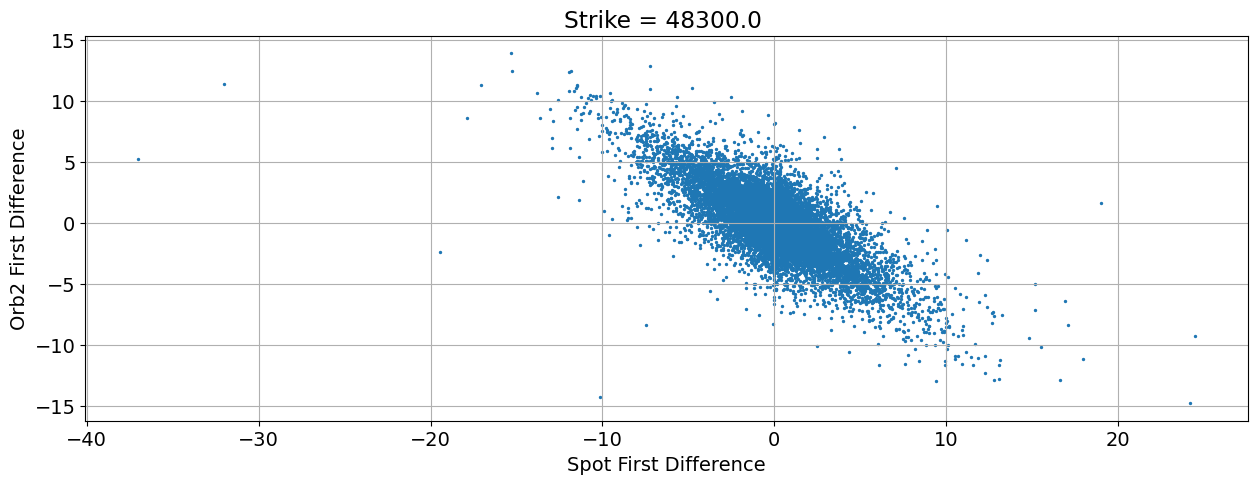

In [84]:
date = dates_formated[0]

x = main_dict[date]['Spot']['Close'].diff()
y = main_dict[date]['Strike'][48300.0]['Orb2_diff']

plt.scatter( x[1:] , y[1:] , s = 2  )
plt.xlabel('Spot First Difference')
plt.ylabel('Orb2 First Difference')
plt.title('Strike = 48300.0 ')
plt.grid()
plt.show()

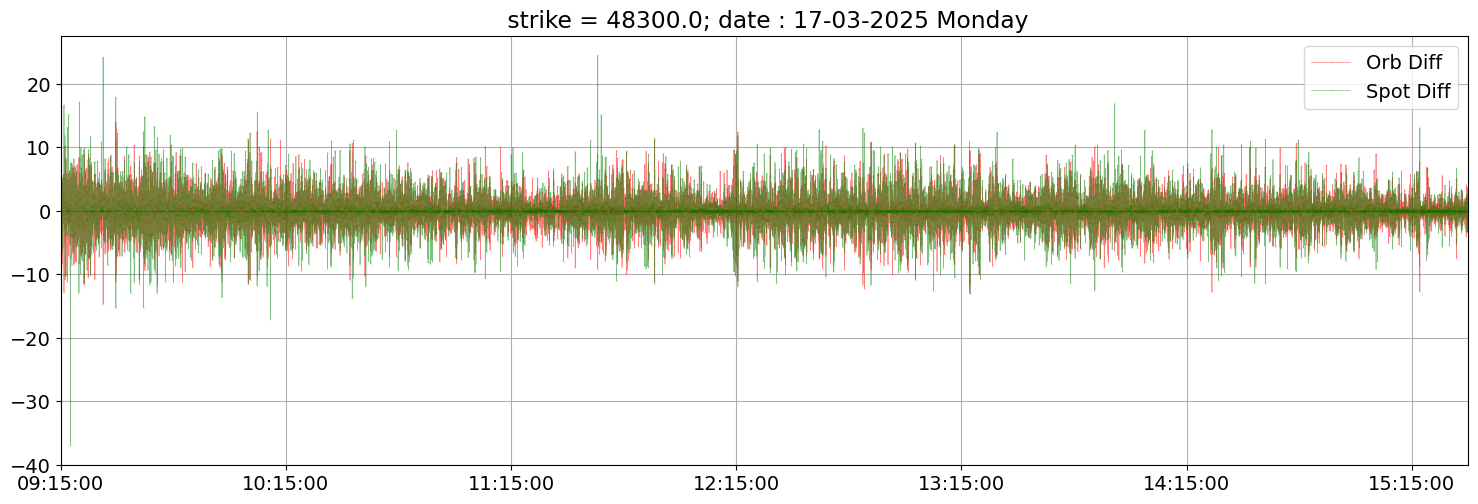

In [85]:
start_time , end_time = main_dict[date]['Stamp']
plt.figure()
plt.plot( x.index[1:] , y[1:]  , 'o-' , color = 'r' , markersize=0.1 , label = 'Orb Diff' , alpha = 0.5 )
plt.plot( x.index[1:] , x[1:]  , 'o-' , color = 'g' , markersize=0.1 , label = 'Spot Diff', alpha = 0.5 )
plt.xlim( start_time , end_time )
plt.tight_layout()
plt.xticks(
    ticks = pd.date_range(start=start_time, end=end_time, freq='1h') , 
    labels = pd.date_range( start = start_time  , end = end_time, freq = '1h' ).time
)
plt.grid()
plt.legend()
plt.title( f" strike = 48300.0; date : {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
plt.show()

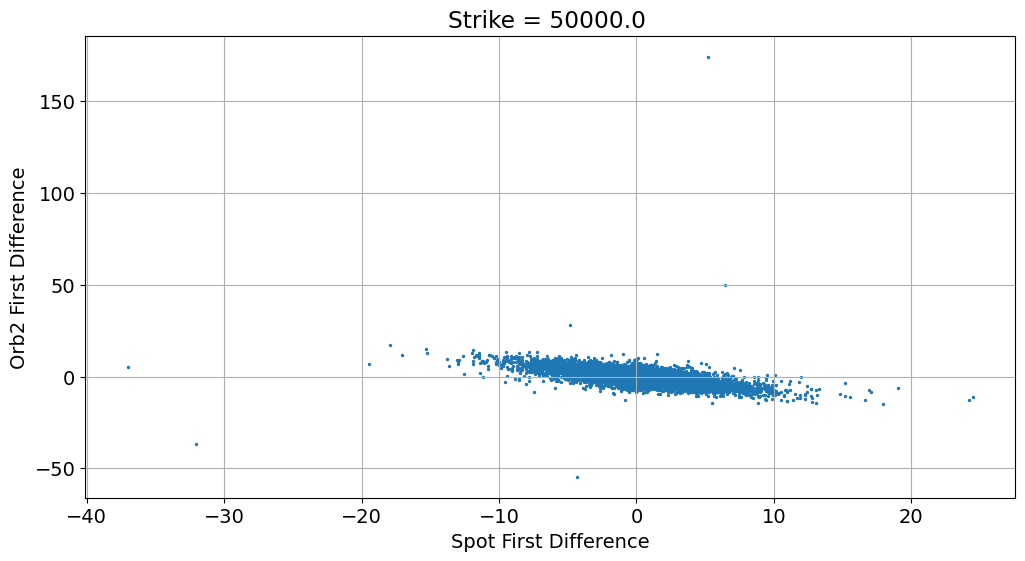

In [86]:
x = main_dict[date]['Spot']['Close'].diff()
y = main_dict[date]['Strike'][50000.0]['Orb2_diff']

plt.figure( figsize = (12,6))
plt.scatter( x[1:] , y[1:] , s = 2  )
plt.xlabel('Spot First Difference')
plt.ylabel('Orb2 First Difference')
plt.title('Strike = 50000.0 ')
plt.grid()
plt.show()

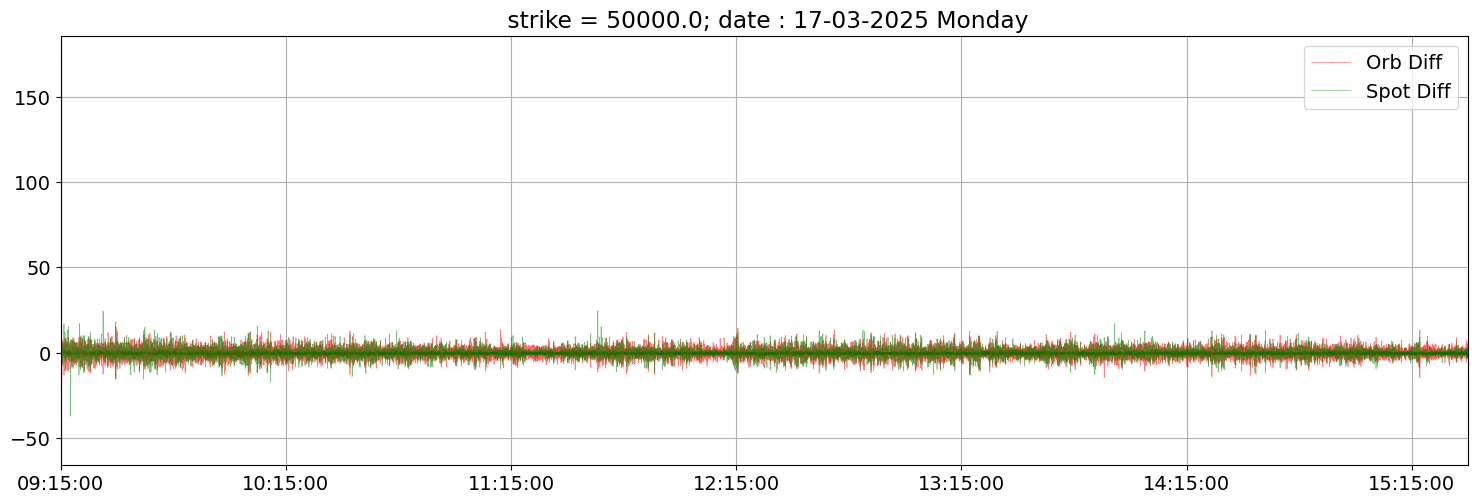

In [87]:
start_time , end_time = main_dict[date]['Stamp']
plt.figure()
plt.plot( x.index[1:] , y[1:]  , 'o-' , color = 'r' , markersize=0.1 , label = 'Orb Diff' , alpha = 0.5 )
plt.plot( x.index[1:] , x[1:]  , 'o-' , color = 'g' , markersize=0.1 , label = 'Spot Diff', alpha = 0.5 )
plt.xlim( start_time , end_time )
plt.tight_layout()
plt.xticks(
    ticks = pd.date_range(start=start_time, end=end_time, freq='1h') , 
    labels = pd.date_range( start = start_time  , end = end_time, freq = '1h' ).time
)
plt.grid()
plt.legend()
plt.title( f" strike = 50000.0; date : {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
plt.show()

In [88]:
result = np.corrcoef( x[1:]  , y[1:]) 

In [89]:
result 

array([[ 1.        , -0.54641753],
       [-0.54641753,  1.        ]])

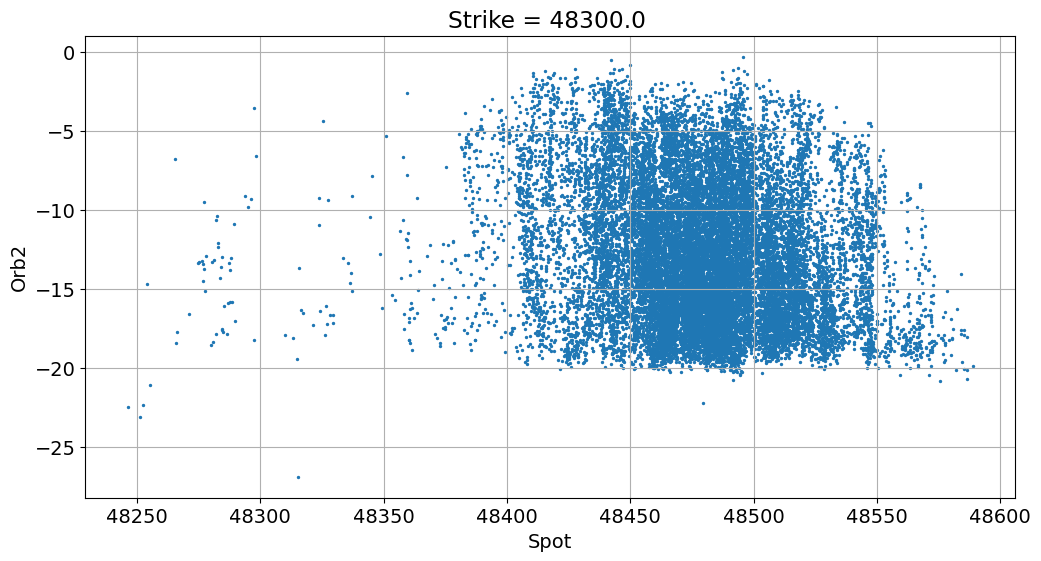

In [90]:
x = main_dict[date]['Spot']['Close']
y = main_dict[date]['Strike'][48300.0]['Orb2']

plt.figure( figsize = (12,6))
plt.scatter( x , y, s = 2  )
plt.xlabel('Spot')
plt.ylabel('Orb2')
plt.title('Strike = 48300.0 ')
plt.grid()
plt.show()

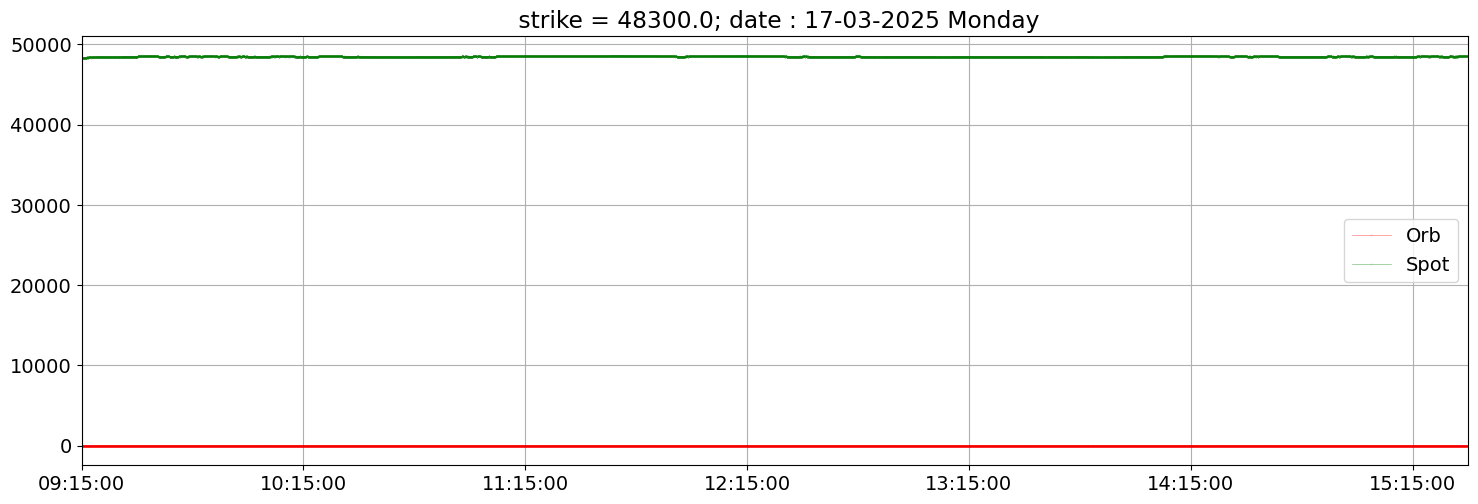

In [91]:
start_time , end_time = main_dict[date]['Stamp']
plt.figure()
plt.plot( x.index[1:] , y[1:]  , 'o-' , color = 'r' , markersize=0.1 , label = 'Orb' , alpha = 0.5 )
plt.plot( x.index[1:] , x[1:]  , 'o-' , color = 'g' , markersize=0.1 , label = 'Spot', alpha = 0.5 )
plt.xlim( start_time , end_time )
plt.tight_layout()
plt.xticks(
    ticks = pd.date_range(start=start_time, end=end_time, freq='1h') , 
    labels = pd.date_range( start = start_time  , end = end_time, freq = '1h' ).time
)
plt.grid()
plt.legend()
plt.title( f" strike = 48300.0; date : {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
plt.show()

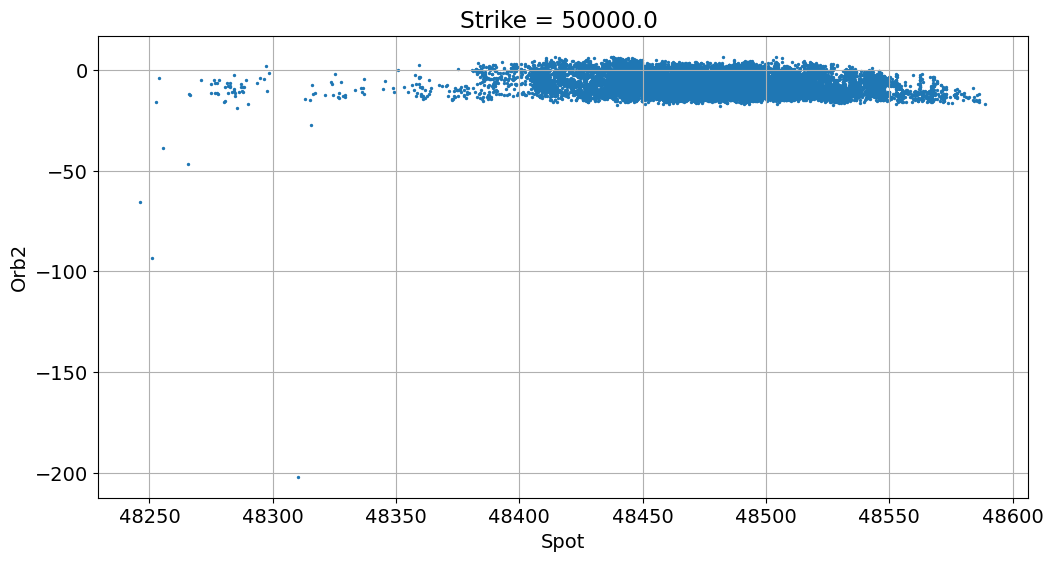

In [92]:
x = main_dict[date]['Spot']['Close']
y = main_dict[date]['Strike'][50000.0]['Orb2']

plt.figure( figsize = (12,6))
plt.scatter( x , y, s = 2  )
plt.xlabel('Spot')
plt.ylabel('Orb2')
plt.title('Strike = 50000.0 ')
plt.grid()
plt.show()

In [99]:
orb_dict = {}
orb_df = pd.DataFrame()


for date in main_dict.keys() : 
    orb_dict[date] =  pd.DataFrame() 
    spot_return_corr = []
    for strike , df in main_dict[date]['Strike'].items() : 
        orb_dict[date][strike] = df['Orb2_diff']
        spot_return_corr.append(main_dict[date]['Spot']['Spot Return %'].corr(df['Orb2_diff']))
    orb_dict[date] = orb_dict[date].corr()
    orb_dict[date]['Spot'] = spot_return_corr 


In [100]:
import seaborn as sns

In [ ]:
for date , corr in orb_dict.items() : 

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title(f"Orb2 First Diff Correlation Matrix for \n {input['underlying']}; exp: {input['exp']}; on {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
    plt.xlabel("Strike Price")
    plt.ylabel("Strike Price")
    plt.tight_layout()
    plt.savefig(f"Date-Range-Plots/Corr/Orb_diff_corr_{date}.png")
    plt.show()

In [104]:
for date in orb_dict : 
    print(f'{date}')
    print(orb_dict[date].describe())
    print('-'*20) 

17-03-2025
           46300      46400      46500      46600      46700      46800  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean    0.242995   0.153508   0.537091   0.054265   0.118451   0.315357   
std     0.141647   0.143903   0.204220   0.153574   0.145269   0.145601   
min     0.031720   0.006900   0.019301   0.006900   0.023444   0.009986   
25%     0.207065   0.117271   0.495816   0.026057   0.085990   0.303032   
50%     0.256395   0.153106   0.621098   0.033155   0.108809   0.336485   
75%     0.274117   0.163156   0.663075   0.035734   0.115669   0.357941   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           46900      47000      47100      47200  ...      49400      49500  \
count  40.000000  40.000000  40.000000  40.000000  ...  40.000000  40.000000   
mean    0.234700   0.659184   0.377006   0.596200  ...   0.647713   0.664961   
std     0.144255   0.249963   0.194680   0.221040  ...   0.245515   0.241

In [97]:
orb_dict = {}
orb_df = pd.DataFrame()


for date in main_dict.keys() : 
    orb_dict[date] =  pd.DataFrame() 
    spot_return_corr = []
    for strike , df in main_dict[date]['Strike'].items() : 
        orb_dict[date][strike] = df['Orb2']
    orb_dict[date] = orb_dict[date].corr() 


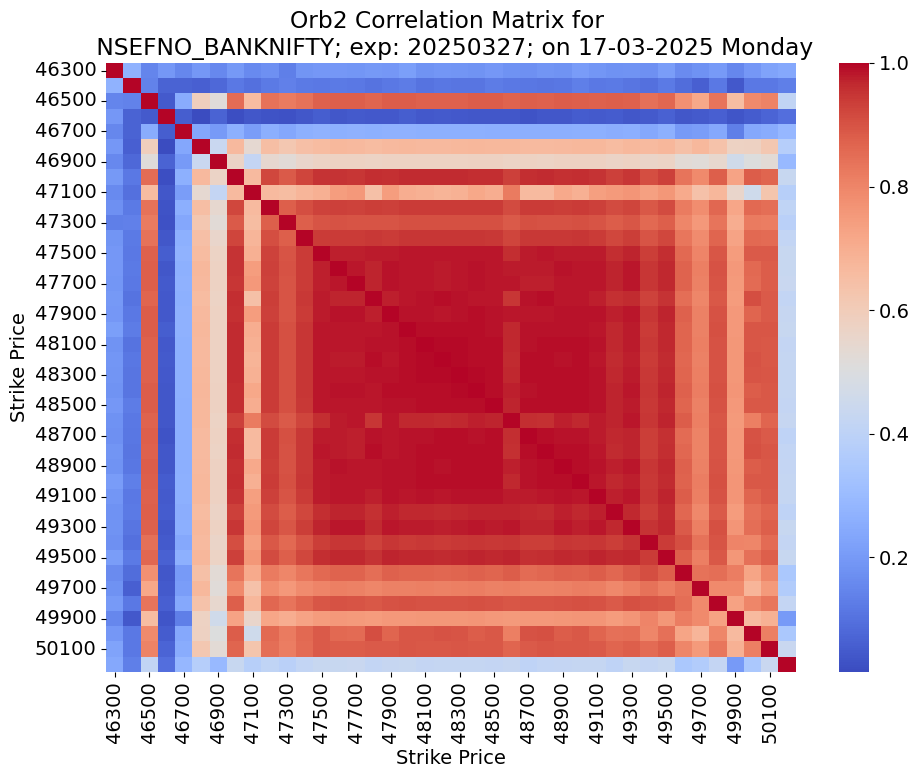

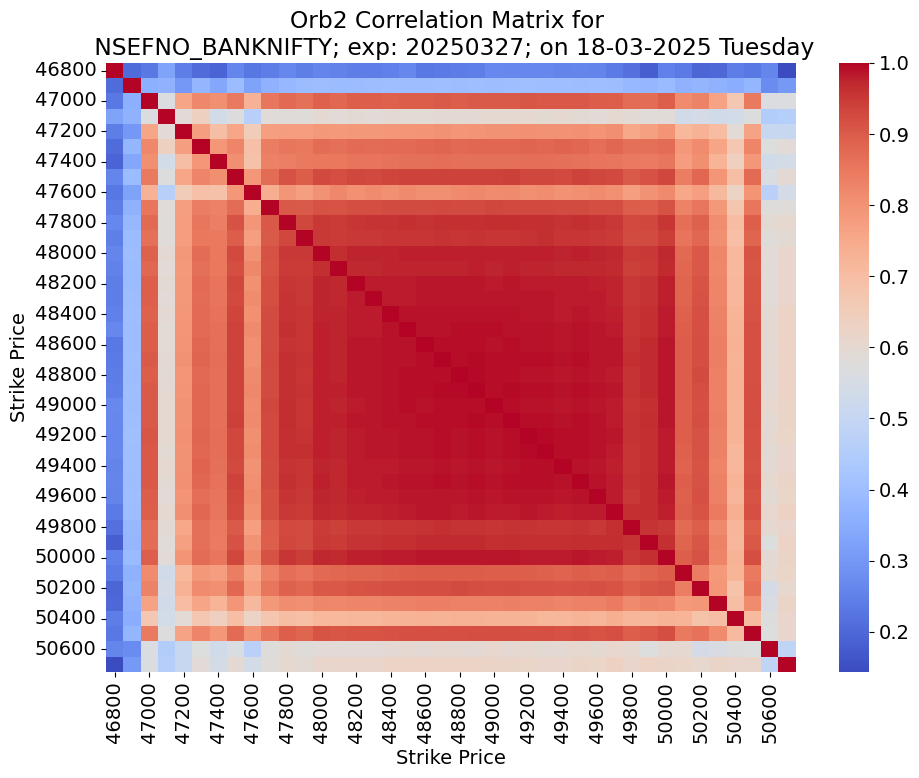

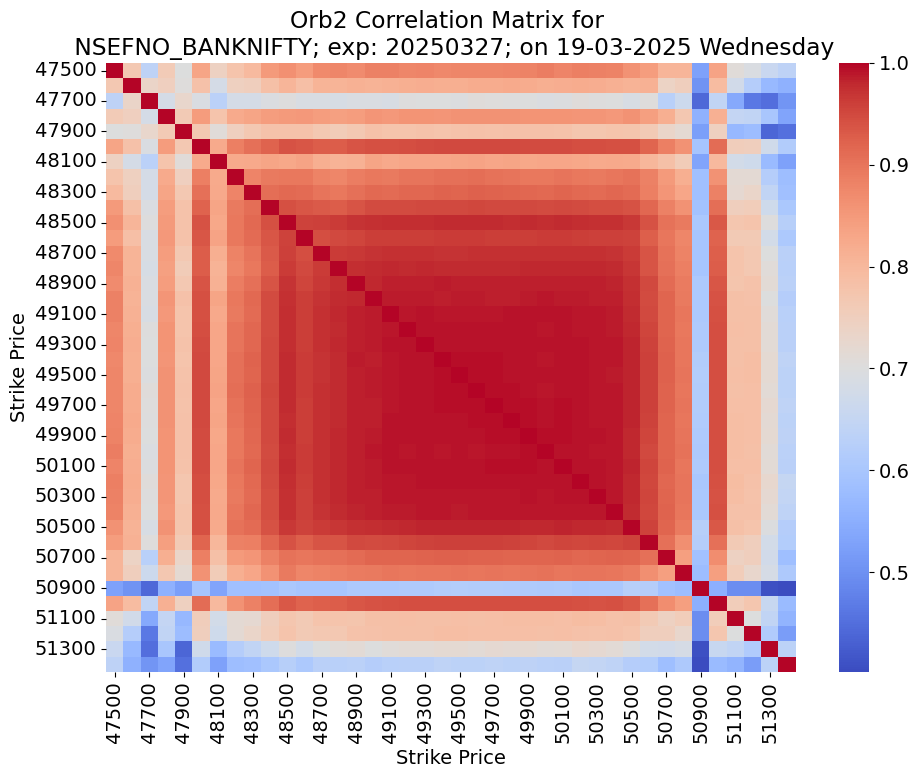

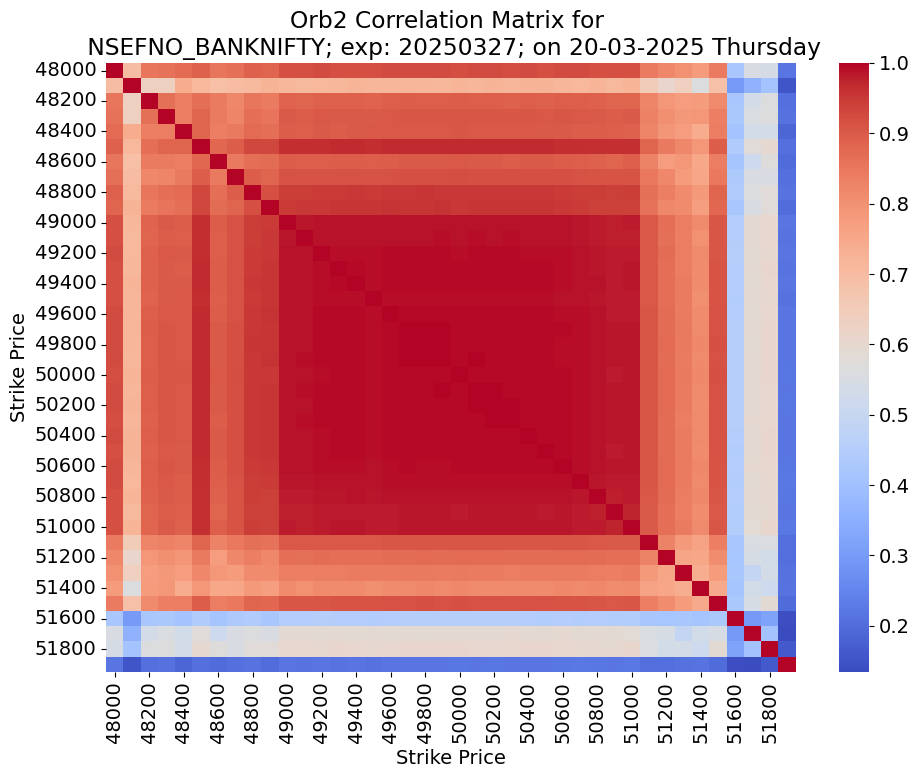

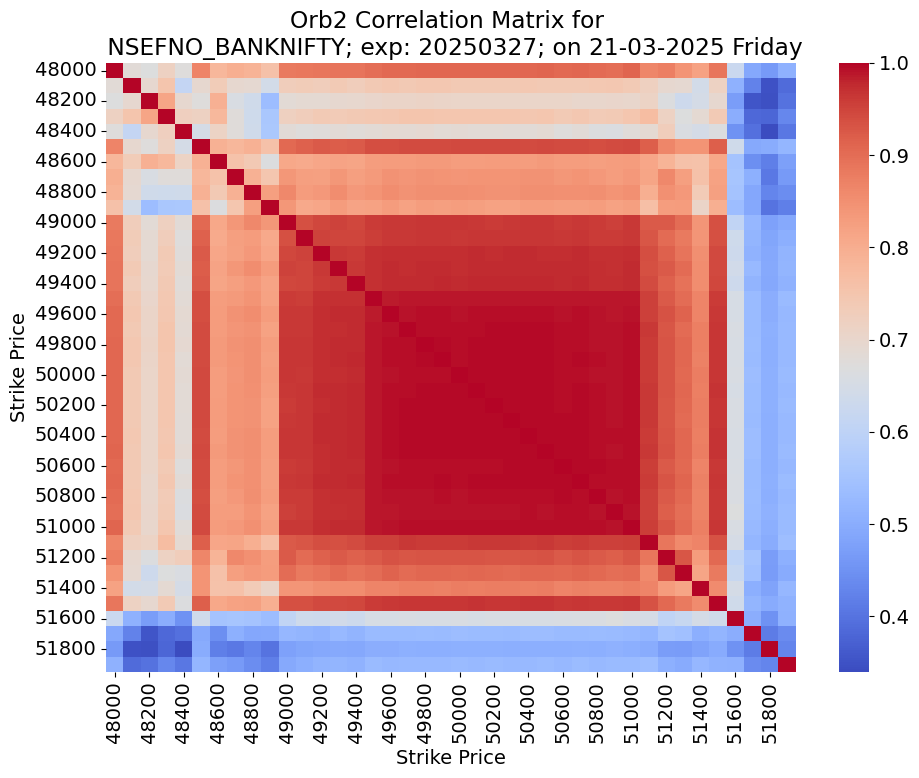

In [98]:
for date , corr in orb_dict.items() : 

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title(f"Orb2 Correlation Matrix for \n {input['underlying']}; exp: {input['exp']}; on {date} {pd.to_datetime( date , dayfirst=True).day_name()}")
    plt.xlabel("Strike Price")
    plt.ylabel("Strike Price")
    plt.tight_layout()
    plt.savefig(f"Date-Range-Plots/Corr/Orb_diff_corr_{date}.png")
    plt.show()

In [47]:
date = dates_formated[0]
row , col = np.where( (orb_dict[date] < 0 ) == True )

In [48]:
orb_dict[date].columns[row] , orb_dict[date].columns[col]

(Index([46300, 46400, 46500, 46600, 46700, 46800, 46900, 47000, 47100, 47100,
        47200, 47300, 47400, 47500, 47600, 47700, 47800, 47900, 48000, 48100,
        48200, 48300, 48400, 48500, 48600, 48700, 48800, 48900, 49000, 49100,
        49200, 49300, 49400, 49500, 49600, 49700, 49800, 49900, 50000, 50000,
        50100, 50200],
       dtype='object'),
 Index(['Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot',  50000,
        'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot',
        'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot',
        'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot', 'Spot',
        'Spot', 'Spot',  47100, 'Spot', 'Spot', 'Spot'],
       dtype='object'))

In [49]:
orb_dict[date].iloc[row[0] , col[0]]

np.float64(-0.33456469191517224)

In [50]:
orb_dict[date]

,46300,46400,46500,46600,46700,46800,46900,47000,47100,47200,...,49400,49500,49600,49700,49800,49900,50000,50100,50200,Spot
46300,1.000000,0.056556,0.187043,0.031720,0.049911,0.144219,0.090770,0.257875,0.121359,0.246676,...,0.254745,0.281438,0.200837,0.229919,0.227662,0.192671,0.233293,0.209140,0.116451,-0.334565
46400,0.056556,1.000000,0.117656,0.006900,0.023444,0.073960,0.024518,0.151104,0.076622,0.137209,...,0.147985,0.148349,0.115374,0.111742,0.128015,0.116115,0.117917,0.121480,0.102763,-0.155827
46500,0.187043,0.117656,1.000000,0.019301,0.092178,0.311510,0.193388,0.620743,0.320108,0.568235,...,0.575479,0.601360,0.528157,0.466341,0.528584,0.507069,0.518568,0.446935,0.220966,-0.553123
46600,0.031720,0.006900,0.019301,1.000000,0.034299,0.009986,0.024233,0.020552,0.016978,0.038886,...,0.030828,0.038967,0.031959,0.032077,0.026078,0.021152,0.023135,0.014710,0.026569,-0.087697
46700,0.049911,0.023444,0.092178,0.034299,1.000000,0.068111,0.053877,0.103765,0.052269,0.101978,...,0.092142,0.111689,0.087878,0.080326,0.100494,0.057689,0.099141,0.076839,0.075323,-0.127287
46800,0.144219,0.073960,0.311510,0.009986,0.068111,1.000000,0.132276,0.335911,0.198627,0.322873,...,0.316552,0.376653,0.308778,0.372572,0.297907,0.306256,0.304741,0.280195,0.142799,-0.345165
46900,0.090770,0.024518,0.193388,0.024233,0.053877,0.132276,1.000000,0.249613,0.115584,0.226829,...,0.233051,0.259684,0.226112,0.181040,0.220616,0.182048,0.209366,0.173852,0.083527,-0.212552
47000,0.257875,0.151104,0.620743,0.020552,0.103765,0.335911,0.249613,1.000000,0.355817,0.698782,...,0.730190,0.748778,0.641707,0.542336,0.617807,0.576313,0.642051,0.564557,0.263272,-0.667201
47100,0.121359,0.076622,0.320108,0.016978,0.052269,0.198627,0.115584,0.355817,1.000000,0.348629,...,0.511700,0.548075,0.404923,0.301880,0.307900,0.294317,-0.006672,0.270926,0.142513,-0.357343
47200,0.246676,0.137209,0.568235,0.038886,0.101978,0.322873,0.226829,0.698782,0.348629,1.000000,...,0.641790,0.674665,0.583467,0.499404,0.573943,0.533415,0.575936,0.507530,0.237697,-0.623594
